In [1]:
#당뇨병 데이터 준비하기
from sklearn.datasets import load_diabetes #사이킷런에서 당뇨병데이터 호출
diabetes = load_diabetes()  #diabetes 라는 변수안에 당뇨병 데이터 선언

In [2]:
#입력과 타깃 데이터 크기 확인하기
print(diabetes.data.shape, diabetes.target.shape) # 당뇨병데이터의 데이터와 타겟을 출력
#shape함수는 배열의 형태를 튜플로 반환해준다


(442, 10) (442,)


In [3]:
#데이터 자세히보기
diabetes.data[0:3] # 슬라이싱을 사용하여 0부터 3미만까지 출력
#따라서 결과값은 data의 1번,2번,3번 샘플의 10개의 특성값이 나온다

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
#타깃 데이터 자세히보기
diabetes.target[:3]
#슬라이싱을 사용하여 3미만까지 출력
#결과는 1번째 2번째 3번째 tartget값 출력

array([151.,  75., 141.])

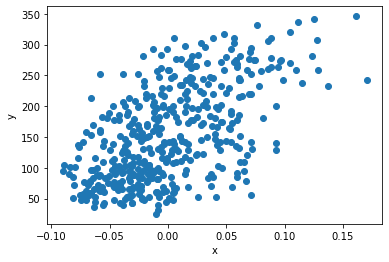

In [5]:
#맷플롯립 의 스캐터 함수로 산점도그리기
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)  #전체의 데이터중[:,2] 3번째feature를 선택 #X값과 Y값의 사이즈는 반드시 같아야함.
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [6]:
#훈련 데이터 준비하기
x = diabetes.data[:,2] # x에 당뇨병데이터의 전체에서 3번쨰feature만 선언
y = diabetes.target # Y에 당뇨병데이터의 target 값 선언
print(x[0])

0.0616962065186885


회귀알고리즘 중 선형 회귀 알고리즘의 개념을 알아보고 실제 알고리즘을 만들어보기 위한 당뇨병 데이터 셋을 준비함 03-2절에서는 경사하강법에 대해배운다.

In [7]:
#w,b 초기화하기 w는 가중치 / b는 절편
w = 1.0
b = 1.0

In [8]:
#훈련 데이터의 첫 번쨰 셈플 데이터 얻기
#y_hat은 예측치 / 예측치 = 데이터 * 가중치 + 절편 = 0.0616962065186885 * 1.0 + 1.0
y_hat = x[0] * w + b 
print(y_hat)

1.0616962065186886


In [9]:
#타깃과 예측데이터 비교하기
print(y[0]) #타겟의 0번째 값은 151.

151.0


In [10]:
# w값 조절해 예측값 바꾸기
w_inc = w + 0.1 # w_inc는 가중치 변경을 위해 사용
y_hat_inc = x[0] * w_inc + b # 0.0616962065186885 * 1.1 + 1.0
print(y_hat_inc)

1.0678658271705574


In [11]:
# w 값 조정후 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w) # w_rate = (예측치증가값 - 예측치) / (가중치 증가값 - 가중치)
print(w_rate)

0.061696206518688734


In [12]:
#변화율로 절편 업데이트 하기
b_inc = b + 0.1  # b_inc 는 절편 업데이트값
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)   # b_rate 는 변화율

1.1616962065186887
1.0


In [13]:
#오차와 변화율을 곱하여 가중치 업데이트하기
err = y[0] - y_hat # err = 타겟의0번째값 - 예측치(1.06...)
w_new = w + w_rate * err # w_new = 가중치(1.0) + 가중치변화율(0.06...) * err
b_new = b + 1 * err # b_new = 절편(1.0) + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [14]:
#샘플 변경하여 다시 실행
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

#가중치는 4만큼 증가하고 절편은 반정도 절감함.

14.132317616381767 75.52764127612664


In [15]:
#전체 샘플 반복하기
for x_i, y_i in zip(x,y):   # x는 전체샘플의 3번째feature / y는 target
    y_hat = x_i * w + b     # 예측치 = x[0] * 가중치(1.0) + 절편(1.0)
    err = y_i - y_hat       # err = y[0] - 예측치
    w_rate = x_i            # 가중치 변화율 = x[0]
    w = w + w_rate * err    # 가중치 = 가중치 + 가중치변화율 * err
    b = b + 1 * err         # 절편 = 절편 + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


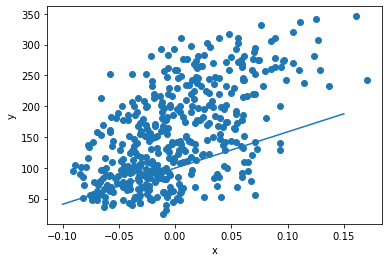

In [16]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)   # 1번 지점 x좌표는 -0.1 y좌표는 40.622~~
pt2 = (0.15, 0.15 * w + b)   # 2번 지점 x좌표는 0.15 y좌표는 187.589~~
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]]) # x좌표 먼저 찍음 그리고 y좌표를 찍음
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
#에포크 반복
for i in range(1, 100):   # 총 44200번 돌아감
    for x_i, y_i in zip(x,y):   # 442번 돌때 나감.
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w,b)

913.5973364345905 123.39414383177204


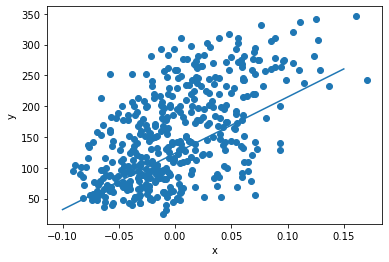

In [18]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
#모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b    # y_pred = 0.18 * 913.597... + 123.3941...
print(y_pred)

287.8416643899983


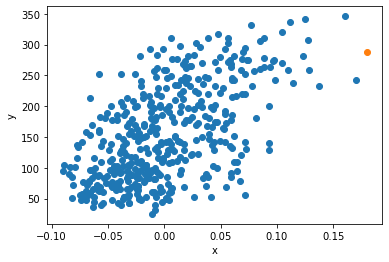

In [20]:
#산점도 위에 데이터 나타내기
plt.scatter(x,y)          #x[0],y[0] .........x[442],y[442] 찍어줌
plt.scatter(x_new, y_pred)     #x는 0.18 y는 287.84...
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3-4장 선형 회귀를 위한 뉴런 만들기

In [21]:
#클래스 만들기
class Neuron:
  
    def __init__(self):   #생성자
        self.w = 1.0      # 가중치 초기화
        self.b = 1.0      # 절편 초기화
    
    def forpass(self, x):    # 정방향 계산 y = ax +b
        y_hat = x * self.w + self.b    # 예측치 = 데이터 * 가중치 + 절편
        return y_hat
  
    def backprop(self, x, err):   # 변화율 구하는 Method
        w_grad = x * err          # 가중치 변화율 = x * err
        b_grad = 1 * err          # 절편 변화율 = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):     # epochs만큼 반복 훈련 하기 위한 Method
        for i in range(epochs):          # epochs만큼 반복
            for x_i, y_i in zip(x,y):    # x,y만큼 반복(442번)
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad     # 가중치 업데이트
                self.b -= b_grad     # 절편 업데이트
                


In [22]:
neuron = Neuron()   #오브젝트 nueron = Neuron()클래스
neuron.fit(x,y)   #Neuron()클래스 안에 fit메소드를 호출 매개변수는 x,y값

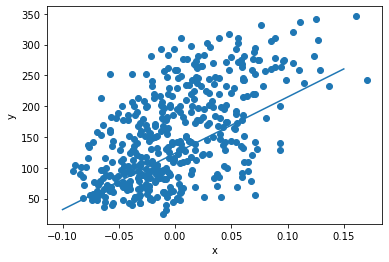

In [23]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4장 분류하는 뉴런 만들기

In [24]:
from sklearn.datasets import load_breast_cancer     #사이킷런에서 유방암데이터 호출
cancer = load_breast_cancer()      #cancer 변수에 유방암데이터 선언

In [25]:
#입력 데이터 확인
print(cancer.data.shape, cancer.target.shape)    #cancer의 데이터는 569개의 샘플, 30개의 특성 / target은 569개의 샘플

(569, 30) (569,)


In [26]:
#샘플 출력
cancer.data[:3]


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

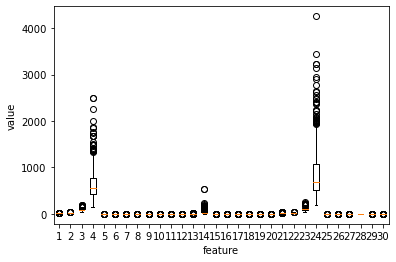

In [27]:
#박스플롯으로 사분위 관찰하기
plt.boxplot(cancer.data)
plt.xlabel('feature')    # 30개의 특성
plt.ylabel('value')      # 값
plt.show()

In [28]:
#눈에 띄는 4,14,24번 특성 살펴보기
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [29]:
#타깃 데이터 확인하기
#넘파이를 import안해주면 코드 에러뜸.
import numpy as np
np.unique(cancer.target, return_counts=True)
# 유니크 함수를 사용하여 target의 유일한값인 0,1로 출력 / return_counts 는 등장하는 횟수를 작성
# 212개의 음성클래스(정상종양), 357개의 양성클래스(악성종양)

(array([0, 1]), array([212, 357]))

In [30]:
#데이터 세트 저장하기
x = cancer.data
y = cancer.target
print(x.shape,y.shape)

(569, 30) (569,)


In [31]:
#훈련 데이터 세트 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# stratify=y 는 훈련데이터를 나눌때 클래스 비율을 동일하게 만들때 사용
# test_size=0.2 는훈련데이터 세트의 비율을 조절하고 싶을때 사용
# random_state=42 는 무작위로 데이터세트를 섞은 다음 나누기위해 사용

In [32]:
#결과보기
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [33]:
#unique()함수로 훈련 셋 타깃 확인하기
np.unique(y_train, return_counts=True) # target의 트레이닝 세트에는 170개의 음성클래스와 285개의 양성클래스


(array([0, 1]), array([170, 285]))

In [34]:
#로지스틱 회귀 구현하기
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b   # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err                  # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err                  # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))         # 시그모이드 계산 (선형함수를 -제곱한다.)
        return a
    
    def fit(self, x, y, epochs=100):      # x는 x_train, y는 y_train 이포는 100
        self.w = np.ones(x.shape[1])      # 가중치를 초기화 (x.shape[1] 과 동일한 크기의 배열을 만들고 값을 모두 1로 초기화)
        self.b = 0                        # 절편 초기화
        for i in range(epochs):           # epochs 만큼 반복
            for x_i, y_i in zip(x,y):     # zip(455만큼반복)
                z = self.forpass(x_i)         # 정방향계산 (z는 선형함수)
                a = self.activation(z)        # 활성화 함수 작용 (a는 활성화함수 작용하고 나온 선형함수)
                err = -(y_i - a)              # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  #역방향 계산
                self.w -= w_grad              # 가중치 업데이트
                self.b -= b_grad              # 절편 업데이트
    
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
        a = self.activation(np.array(z))     # 활성화 함수 적용
        return a > 0.5                      # 계단 함수 적용

In [35]:
logneuron = LogisticNeuron()
logneuron.fit(x_train, y_train)

<ipython-input-34-77dd22eb428c>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))         # 시그모이드 계산 (선형함수를 -제곱한다.)


In [36]:
np.mean(logneuron.predict(x_test) == y_test)

<ipython-input-34-77dd22eb428c>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))         # 시그모이드 계산 (선형함수를 -제곱한다.)


0.8245614035087719

4-6 로지스틱 회귀 뉴런으로 단일층 신경망 만들기

In [37]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []   #손실함수의 결과값을 저장할 리스트
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b        # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err                       # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err                       # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad
    
#     def add_bias(self, x):
#         return np.c_[np.ones((x.shape[0], 1)), x]
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))               # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])      # 가중치 초기화
        self.b = 0                        # 절편 초기화
        for i in range(epochs):          # epochs 만큼 반복
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))     #인덱스를 섞습니다. 샘플데이터를 무작위로 나열하기위해
            for i in indexes:            # 모든 샘플에 대해 반복
                z = self.forpass(x[i])   # 정방향 계산
                a = self.activation(z)   # 활성화 함수 계산
                err = -(y[i] - a)        # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad         # 가중치 업데이트
                self.b -= b_grad         # 절편 업데이트
                a = np.clip(a, 1e-10, 1-1e-10)             # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적함.
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))  # 에포크마다 평균 손실 저장
            self.losses.append(loss/len(y))
            
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]   # 정방향 계산
        #a = self.activation(np.array(z))
        return np.array(z) > 0                 # 계단 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [38]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test,y_test)

<ipython-input-37-f10e73958066>:21: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))               # 시그모이드 계산


0.9210526315789473

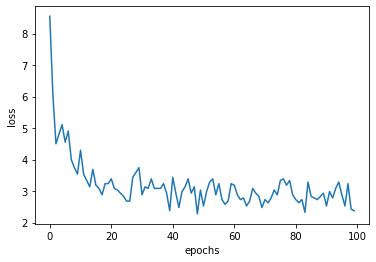

In [39]:
plt.plot(layer.losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

04-7 사이킷런으로 로지스틱 회귀 수행

In [40]:
#로지스틱 손실함수 지정하기
#라이브러리 호출 안해주면 에러남
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)
# max_iter를 통해 반복횟수 100 지정
# random_state를 통해 난수 초깃값을 42로 설정
# 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되지 않으면 반복을 중단하도록 설정 
# tol의 값을 설정하지않으면 max_iter의 값을 늘리라는 경고 발생

In [41]:
sgd.fit(x_train , y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [42]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

5-1 검증세트를 나누고 전처리 과정 배우기

In [43]:
from sklearn.datasets import load_breast_cancer    # 유방암 데이터 호출
from sklearn.model_selection import train_test_split  # 데이터를 분리하기 위한 split함수 호출
cancer = load_breast_cancer()    # 변수 cancer에 유방암 데이터 선언
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, 
                                                            test_size = 0.2, random_state = 42)
# stratify=y 는 훈련데이터를 나눌때 클래스 비율을 동일하게 만들때 사용
# test_size=0.2 는훈련데이터 세트의 비율을 조절하고 싶을때 사용
# random_state=42 는 무작위로 데이터세트를 섞은 다음 나누기위해 사용

In [44]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [45]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state= 42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9385964912280702

In [46]:
# 검증세트 분할하기
#x_train = 364 / x_val = 91
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify = y_train_all, test_size = 0.2, random_state=42)
# 훈련데이터세트를 검증데이터와 8:2로 분리
print(len(x_train), len(x_val))

364 91


In [47]:
#검증세트 사용해 모델 평가하기
sgd = SGDClassifier(loss='log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

['mean perimeter' 'mean area']


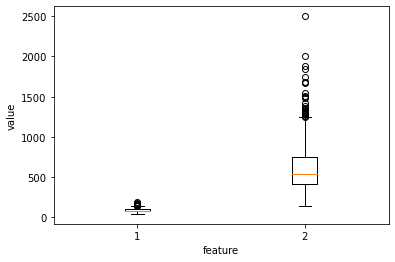

In [48]:
#훈련 데이터 준비하고 스케일 비교하기
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [49]:
#5-1장 클래스 변경하기
class SingleLayer1:
    def __init__(self, learning_rate = 0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []         # 가중치를 기록하기위해 사용
        self.lr = learning_rate
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x]
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])          # 가중치 초기화
        self.b = 0                            # 절편 초기화
        self.w_history.append(self.w.copy())  # 가중치를 기록
        np.random.seed(42)                    # 무작위로 시드 저장
        for i in range(epochs):              # epochs만큼 반복
            loss = 0
            # 인덱스를 섞습니다.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                # 모든 샘플에 대해 반복
                z = self.forpass(x[i])       # 정방향 계산
                a = self.activation(z)       # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= self.lr * w_grad    # 가중치 업데이트(학습률 적용)
                self.b -= b_grad              # 절편 업데이트
                #가중치 기록
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
            # 에포크 마다 평균 손실 저장 
            self.losses.append(loss/len(y))
    
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [50]:
#모델 훈련하고 평가하기
layer1 = SingleLayer1()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

<ipython-input-49-787e07ca8817>:23: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9120879120879121

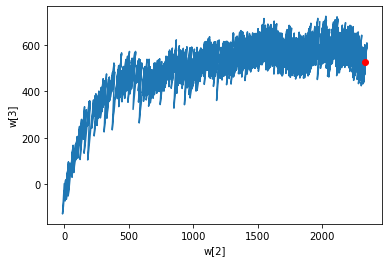

In [51]:
w2 = []
w3 = []
for w in layer1.w_history:     # w_history 는 100번의 에포크 동안 변경된 가중치가 기록되어있음
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [52]:
#넘파이로 표준화 구현하기
train_mean = np.mean(x_train, axis = 0)     # 열을 기준으로 통계치 계산하여 행 백터로 변환(열이 30개이기 때문에 30개나옴)
train_std = np.std(x_train, axis = 0)       # 열을 기준으로 표준편차를 계산
x_train_scaled = (x_train - train_mean) / train_std


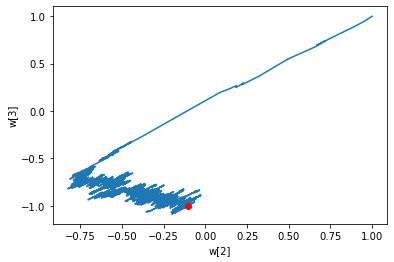

In [53]:
#모델 훈련하기
layer2 = SingleLayer1()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [54]:
#모델 성능 평가
layer2.score(x_val, y_val)

<ipython-input-49-787e07ca8817>:23: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.37362637362637363

In [81]:
val_mean = np.mean(x_val, axis = 0)     # 검증데이터의 열을 기준으로 통계치 계산하여 행 벡터로 변환
val_std = np.std(x_val, axis = 0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)


0.967032967032967

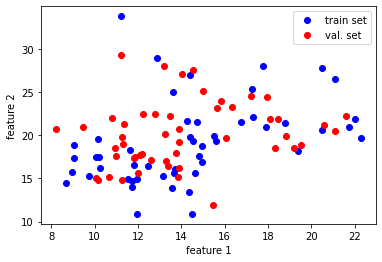

In [56]:
#원본 훈련세트와 검증 세트로 산점도 그리기
# 파란점이 훈련 세트 빨간점이 검증 세트
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

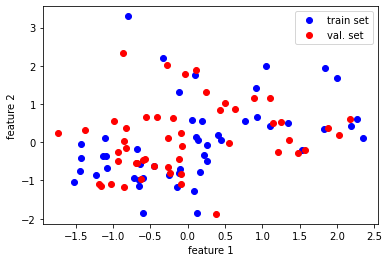

In [57]:
#전처리한 훈련 세트와 검증 세트로 산점도 그리기
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

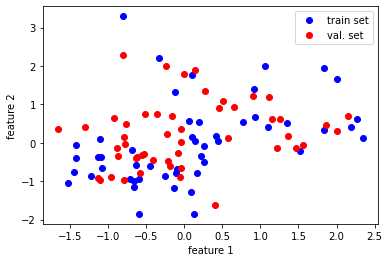

In [58]:
#올바르게 검증 세트 전처리 하기
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [59]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

05-2 과대적합 / 과소 적합 알아보기

In [63]:
#5-2장 클래스 변경하기
class SingleLayer2:
    
    def __init__(self, learning_rate = 0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []           # 검증 세트 손실을 기록하기위해 인스턴스 변수 추가
        self.w_history = []            # 가중치의 변화를 관찰하기위한 인스턴스 변수
        self.lr = learning_rate        # 학습률 파라미터 
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    #정방향 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err                   # 가중치 변화율
        b_grad = 1 * err                   # 절편 변화율
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x]
    
    def activation(self, z):              
        a = 1 / (1 + np.exp(-z))          # 활성화 함수
        return a
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])                          # 가중치 초기화
        self.b = 0                                            # 절편 초기화
        self.w_history.append(self.w.copy())                  # 가중치 기록
        np.random.seed(42)                                    # 무작위로 시드 저장
        for i in range(epochs):                              #이포크 만큼 반복
            loss = 0
            # 인덱스를 섞습니다.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                                # 모든 샘플만큼 반복
                z = self.forpass(x[i])                       # 정방향 계산
                a = self.activation(z)                       # 활성화 함수 적용
                err = -(y[i] - a)                            # 오차계산
                w_grad, b_grad = self.backprop(x[i], err)    #역방향 계산
                self.w -= self.lr * w_grad                   # 가중치 업데이트
                self.b -= b_grad                             # 절편 업데이트
                #가중치 기록
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑 한 후 손실 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
            #에포크마다 평균 손실 저장
            self.losses.append(loss/len(y))
            #검증 세트에 대한 손실 계산
            self.update_val_loss(x_val, y_val)
    
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])        # 정방향 계산
            a = self.activation(z)            # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))

In [64]:
layer3 = SingleLayer2()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

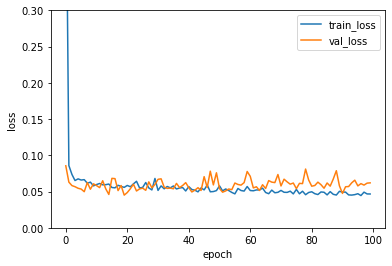

In [65]:
#손실값으로 그래프 그려 에포크 횟수 지정하기
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [63]:
#훈련 조기 종료하기(early stopping)
#early stopping은 특정 시점에서 멈추게한다.
layer4 = SingleLayer2()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

05-3 규제방법 배우고 단일층 신경망에 적용하기

In [73]:
#5-4장 클래스 변경하기
class SingleLayer3:
    
    def __init__(self, learning_rate = 0.1, l1=0, l2=0):    #l1, l2의 기본값은 0
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1                  # l1규제
        self.l2 = l2                  # 강도를 조절하는 매개변수 l2
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b         #정방향 계산
        return z
    
    def backprop(self, x, err):             
        w_grad = x * err             # 가중치 변화율
        b_grad = 1 * err             # 절편 변화율
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x]
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))     #활성화 함수
        return a
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])    # 가중치 초기화
        self.b = 0                      # 절편 초기화
        self.w_history.append(self.w.copy())   # 가중치 기록
        np.random.seed(42)              # 무작위로 시드를 섞음
        for i in range(epochs):        #epochs 만큼 반복
            loss = 0
            #인덱스를 섞습니다.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:              # 모든 샘플에 대해 반복
                z = self.forpass(x[i])      # 정방향 계산
                a = self.activation(z)     # 활성화 함수 계산
                err = -(y[i] - a)          # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                # 그레이디언트에서 페널티 항의 미분값을 더한다.
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w 
                self.w -= self.lr * w_grad  # 가중치 업데이트
                self.b -= b_grad            # 절편 업데이트
                # 가중치 기록
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적함.
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
            #에포크 마다 평균 손실을 저장
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산
            self.update_val_loss(x_val, y_val)
    
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])    # 정방향 계산
            a = self.activation(z)        # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())  #검증 세트 손실값 추가할때 페널티 항 추가하기
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)


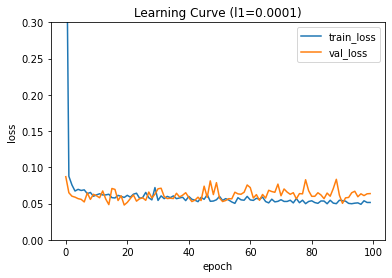

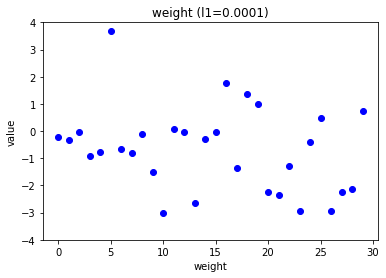

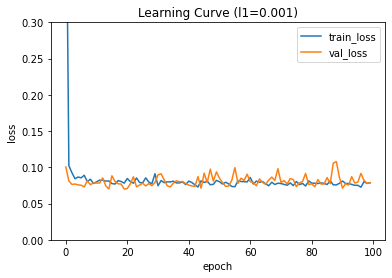

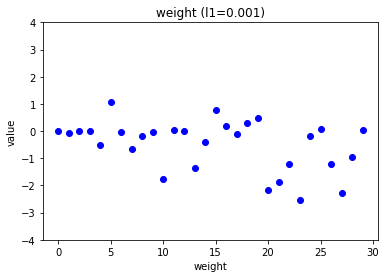

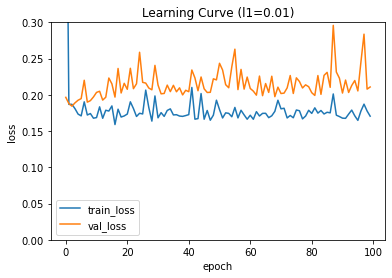

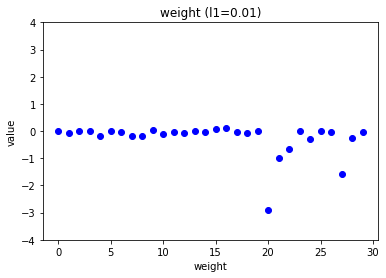

In [75]:
l1_list = [0.0001, 0.001, 0.01]  #규제 강도에 따라 학습곡선과 가중치가 바뀌는걸 확인해보기 위한 리스트
# L1 규제 = 그레이디언트에서 하이퍼 파라미터에 가중치 부호를 곱하여 그레이디언트에 더한다
# w_grad += alpha * np.sign(w)
for l1 in l1_list:
    lyr = SingleLayer3(l1 = l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val = y_val)

    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))  #포맷팅을 사용하여 처음 l1값 0.0001이 괄호안에 입력이된다.
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)   # y축의 최소,최대값 설정
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4,4)
    plt.show()

In [66]:
layer5 = SingleLayer3(l1=0.001)   #앞에 L1규제 값중 L1값이 커질수록 가중치 값은 0에 가까워진다 따라서 중간값인 0.001사용
layer5.fit(x_train_scaled, y_train, epochs=20) #early stopping를 사용하여 epochs 20때 훈련종료
layer5.score(x_val_scaled, y_val)

0.978021978021978

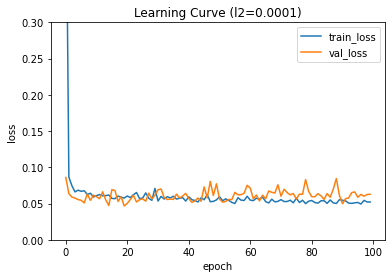

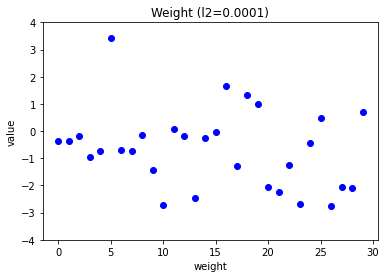

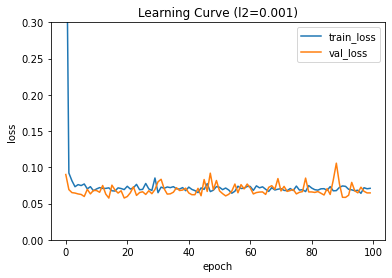

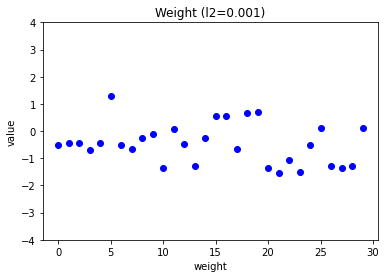

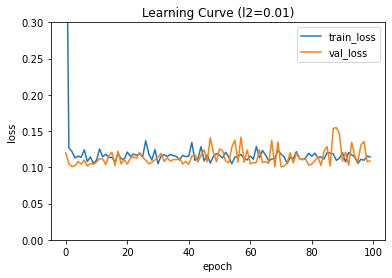

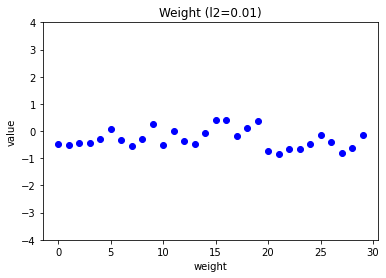

In [76]:
l2_list = [0.0001, 0.001, 0.01]    # L2 규제의 강도 조절 , 모델 훈련 
# L2 규제 = 그레이디언트에서 alpha에 가중치를 곱하여 그레이디언트에 더합니다.
# w_grad += alpha * w
for l2 in l2_list:
    lyr = SingleLayer3(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [83]:
layer6 = SingleLayer3(l2=0.01) # L2규제는 규제 강도가 강해져도 L1 규제만큼 과소적합(언더피팅)이 심해지지는않는다.
                               # 가중치 그래프를 보아도 0에 너무 가깝게 줄어들지 않는다는 것을 알 수 있음.
layer6.fit(x_train_scaled, y_train, epochs=50)  #early stopping 에포크 50번 횟수만큼 훈련후 성능 평가
layer6.score(x_val_scaled, y_val)

0.967032967032967

In [84]:
np.sum(layer6.predict(x_val_scaled) == y_val)

88

In [85]:
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

5-4 교차검증을 알아보고 사이킷런으로 수행해봅시다

In [86]:
validation_scores = []

In [139]:
k = 5              # k-fold 교차 검증이라하여 k는 훈련세트를 k개의 폴드로 나눔
bins = len(x_train) // k   #한 폴드에 들어갈 샘플의 개수/ len(x_train) = 364 // = 72.8 하지만 // 사용했기때문에 72

for i in range(k):   # i 부터 k값까지 반복
    start = i * bins  # start 값은 i * bins(72) = 72
    end = (i+1) * bins # end 값은 (i+1) * bins(72) = 144
    val_fold = x_train_all[start : end]     # 검증폴드의 값은 전체훈련데이터의[72 ~ 143]까지 리스트로 가지고있음
    val_target = y_train_all[start : end]   # 검증타겟의 값은 전체타겟데이터의[72 ~ 143]까지 리스트로 가지고있음
   
    train_index = list(range(0, start)) + list(range(end, len(x_train)))  #트레인_인덱스는 리스트형태[0...72,144....363] 임
    train_fold = x_train_all[train_index]  # 훈련폴드의 값은 전체훈련데이터의[0...72,144...363]
    train_target = y_train_all[train_index] # 훈련타겟의 값은 전체타겟 데이터의[0....72,144...363]    
    
    train_mean = np.mean(train_fold, axis = 0) #train_fold의 행간의 평균을 계산
    train_std = np.std(train_fold, axis = 0)   #train_fold의  행간의 표준편차 계산
    train_fold_scaled = (train_fold - train_mean) / train_std  # 값을 0또는 1로 맞추기 위해 특성의 스케일을 맞춤
    val_fold_scaled = (val_fold - train_mean) / train_std      
    
    lyr = SingleLayer3(l2=0.01)     #L2 규제 사용하여 L2규제의 강도는 0.01
    lyr.fit(train_fold_scaled, train_target, epochs = 50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)
    
print(np.mean(validation_scores))

0.9773825208607818


In [73]:
#cross_validation() 함수로 교차 검증 점수 계산하기
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.001, random_state = 42)
scores = cross_validate(sgd, x_train_all, y_train_all , cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


In [74]:
#Pipeline 클래스 사용해 교차 검증 수행하기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [75]:
print(np.mean(scores['train_score']))

0.9875478561631581


6-1 신경망 알고리즘을 벡터화하여 한번에 전체 샘플을 사용함